In [1]:
import pandas as pd

def read_excel_data(file_path):
    """
    Opens an Excel file and reads the data into a DataFrame.

    Parameters:
        file_path (str): Path to the Excel file.

    Returns:
        pd.DataFrame: DataFrame containing the data from the Excel file.
    """
    try:
        # Read the Excel file
        data = pd.read_excel(file_path)
        print("Data read successfully:")
        print(data.head())  # Display the first few rows for verification
        return data
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Usage example
file_path = "data/test_data.xlsx"
df = read_excel_data(file_path)

Data read successfully:
   Feature 1  Feature 2  Cluster ID
0   5.496714   4.861736           0
1   5.647689   6.523030           0
2   4.765847   4.765863           0
3   6.579213   5.767435           0
4   4.530526   5.542560           0


In [2]:
#read the first and second columns as features np.array
features = df.iloc[:, 0:2].values
print(features)

[[ 5.49671415  4.8617357 ]
 [ 5.64768854  6.52302986]
 [ 4.76584663  4.76586304]
 [ 6.57921282  5.76743473]
 [ 4.53052561  5.54256004]
 [ 4.53658231  4.53427025]
 [ 5.24196227  3.08671976]
 [ 3.27508217  4.43771247]
 [ 3.98716888  5.31424733]
 [ 4.09197592  3.5876963 ]
 [ 6.46564877  4.7742237 ]
 [ 5.0675282   3.57525181]
 [ 4.45561728  5.11092259]
 [ 3.84900642  5.37569802]
 [ 4.39936131  4.70830625]
 [ 4.39829339  6.85227818]
 [ 4.98650278  3.94228907]
 [ 5.82254491  3.77915635]
 [ 5.2088636   3.04032988]
 [ 3.67181395  5.19686124]
 [ 5.73846658  5.17136828]
 [ 4.88435172  4.6988963 ]
 [ 3.52147801  4.28015579]
 [ 4.53936123  6.05712223]
 [ 5.34361829  3.23695984]
 [ 5.32408397  4.61491772]
 [ 4.323078    5.61167629]
 [ 6.03099952  5.93128012]
 [ 4.16078248  4.69078762]
 [ 5.33126343  5.97554513]
 [ 4.52082576  4.81434102]
 [ 3.89366503  3.80379338]
 [ 5.81252582  6.35624003]
 [ 4.92798988  6.0035329 ]
 [ 5.36163603  4.35488025]
 [ 5.36139561  6.53803657]
 [ 4.96417396  6.56464366]
 

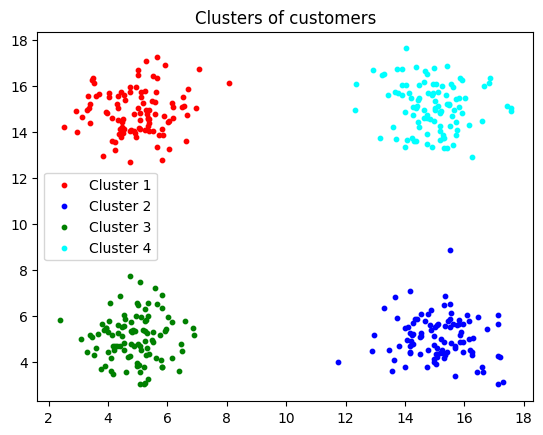

In [3]:
def Kmeans(features, n_clusters):
    """
    Fits a K-means clustering model to the features.

    Parameters:
        features (np.array): Array of feature values.
        n_clusters (int): Number of clusters to form.

    Returns:
        np.array: Cluster labels for each data point.
    """
    from sklearn.cluster import KMeans

    # Fit a K-means model to the data
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(features)

    # Get the cluster labels
    labels = kmeans.labels_
    return labels

# Usage example
n_clusters = 4
labels = Kmeans(features, n_clusters)
#plot the same data points with different colors for different clusters
import matplotlib.pyplot as plt
plt.scatter(features[labels == 0, 0], features[labels == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(features[labels == 1, 0], features[labels == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(features[labels == 2, 0], features[labels == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(features[labels == 3, 0], features[labels == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of customers')

plt.legend()

In [4]:
# write Kmeans algorithm by hand just with numpy
import numpy as np

def Kmeans(features, n_clusters, max_iter=100):
    """
    Fits a K-means clustering model to the features.

    Parameters:
        features (np.array): Array of feature values.
        n_clusters (int): Number of clusters to form.
        max_iter (int): Maximum number of iterations.

    Returns:
        np.array: Cluster labels for each data point.
    """
    # Initialize the centroids
    centroids = features[np.random.choice(range(features.shape[0]), n_clusters, replace=False)]
    all_centroids = [centroids]
    all_labels = []
    for _ in range(max_iter):
        # Calculate the distance between each data point and the centroids
        distances = np.array([np.linalg.norm(features - centroid, axis=1) for centroid in centroids])
        # Assign each data point to the closest centroid
        labels = np.argmin(distances, axis=0)
        # Update the centroids
        new_centroids = np.array([features[labels == i].mean(axis=0) for i in range(n_clusters)])

        all_centroids.append(new_centroids)
        all_labels.append(labels)
        # Check if the centroids have converged
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

Text(0.5, 1.0, 'Clusters of customers')

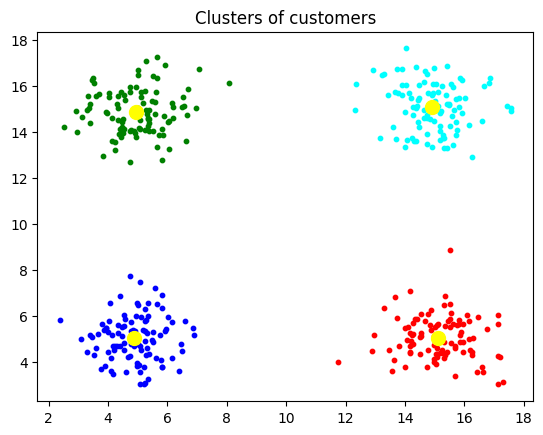

In [5]:
labels, centroids = Kmeans(features, n_clusters, 100)
#plot all labels with centroids
plt.scatter(features[labels == 0, 0], features[labels == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(features[labels == 1, 0], features[labels == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(features[labels == 2, 0], features[labels == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(features[labels == 3, 0], features[labels == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')
plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
